In [1]:
import sys
sys.path.append('../../../lib')
from tqdm import tqdm
from scipy.signal import fftconvolve
import numpy as np
import os
import matplotlib.pyplot as plt
from fast_detection_methods import trajectory_gauss, trajectory_mean, trajectory_corr, fit_gaussian, find_ideal_R,most_common_value
from movie_processing import movie_to_array, clean_problem_pixels
from Powerspectra import powerspectrum, fit_power_spectrum, plot_power_spectra, fast_analytical_noisy_powerspectrum
#from pipython.datarectools import getservotime
import cv2
#core.set_exposure(0.5)##sets the cameras exposure time for snapshots to half a milisecond

In [2]:
def movie_files_from_data_path(data_path):
    files = os.listdir(data_path)
    avi_files = [f for f in files if f[-4:] == '.avi']
    file_paths = [os.path.join(data_path, f) for f in avi_files]
    return file_paths

#data_path = r'\\134.76.13.158\betzlab\Julian\cell_beats\02_03_24\sample_1'
data_path = r'\\134.76.13.158\betzlab\Julian\cell_beats\04_03_24\sample_2'
movie_files = movie_files_from_data_path(data_path)[:3]# + movie_files_from_data_path(data_path_2)[:2]

In [3]:
movie_files= [movie_files[1]]
movie_files

['\\\\134.76.13.158\\betzlab\\Julian\\cell_beats\\04_03_24\\sample_2\\2_khz.avi']

In [4]:
movie_list = []
picture_pair_list = []
for file in movie_files:
    movie_name = file.split('\\')[-1].split('.')[0]
    trajectory_file_path = data_path + '\\' + movie_name + '_trajectories'
    if os.path.exists(trajectory_file_path):
        print('Trajectories already exist for movie', movie_name)
        continue
    numpy_movie = movie_to_array(file)#, max_frames = 20000)
    numpy_movie = clean_problem_pixels(numpy_movie, overwrite=True)
    numpy_movie -= most_common_value(numpy_movie)

    tra_mean = trajectory_mean(numpy_movie, logging_enabled=True)
    tra_corr = trajectory_corr(numpy_movie)
    #tra_gauss = trajectory_gauss(numpy_movie)

    
    

    
    os.mkdir(trajectory_file_path)
    np.save(os.path.join(trajectory_file_path, 'tra_mean.npy'), tra_mean)
    np.save(os.path.join(trajectory_file_path, 'tra_corr.npy'), tra_corr)
    #np.save(os.path.join(data_path, movie_name, 'trajectories', 'tra_gauss.npy'), tra_gauss)



Processing video:   3%|▎         | 7541/301382 [00:03<02:18, 2114.00frame/s] 


KeyboardInterrupt: 

In [7]:
file = movie_files[0]
movie_name = file.split('\\')[-1].split('.')[0]
trajectory_file_path = data_path + '\\' + movie_name + '_trajectories'
movie = movie_to_array(file, max_frames = 2)

Processing video: 100%|██████████| 2/2 [00:00<?, ?frame/s]


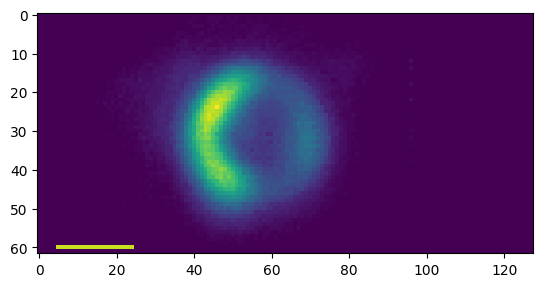

In [11]:
frame = movie[0]
frame[-2,5:25] = 100
plt.imshow(movie[0])
